In [ ]:
# Preliminary steps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Import datasets and view data
employee_df = pd.read_csv("Employee.csv")
performance_df = pd.read_csv("PerformanceRating.csv")
education_df = pd.read_csv("EducationLevel.csv")
rating_df = pd.read_csv("RatingLevel.csv")
satisfaction_df = pd.read_csv("SatisfiedLevel.csv")

# View data
employee_df.head()


In [14]:

# Step 2: Merge Employee with PerformanceRating
merged_df = pd.merge(employee_df, performance_df, on='EmployeeID', how='left')


In [15]:

# Step 3: Map satisfaction columns with SatisfiedLevel
merged_df = pd.merge(
    merged_df, satisfaction_df,
    how='left',
    left_on='EnvironmentSatisfaction',
    right_on='SatisfactionID'
).rename(columns={'SatisfactionLevel': 'EnvironmentSatisfactionLabel'})

merged_df = pd.merge(
    merged_df, satisfaction_df,
    how='left',
    left_on='JobSatisfaction',
    right_on='SatisfactionID'
).rename(columns={'SatisfactionLevel': 'JobSatisfactionLabel'})

merged_df = pd.merge(
    merged_df, satisfaction_df,
    how='left',
    left_on='RelationshipSatisfaction',
    right_on='SatisfactionID'
).rename(columns={'SatisfactionLevel': 'RelationshipSatisfactionLabel'})


In [16]:

# Step 4: Map ratings with RatingLevel
merged_df = pd.merge(
    merged_df, rating_df,
    how='left',
    left_on='SelfRating',
    right_on='RatingID'
).rename(columns={'RatingLevel': 'SelfRatingLabel'})

merged_df = pd.merge(
    merged_df, rating_df,
    how='left',
    left_on='ManagerRating',
    right_on='RatingID'
).rename(columns={'RatingLevel': 'ManagerRatingLabel'})


In [17]:

# Step 5: Add Education Level label
merged_df = pd.merge(
    merged_df, education_df,
    how='left',
    left_on='Education',
    right_on='EducationLevelID'
).rename(columns={'EducationLevel': 'EducationLevelLabel'})


In [18]:

# Step 6: Drop duplicate ID columns if they exist
columns_to_drop = ['SatisfactionID_x', 'SatisfactionID_y', 'SatisfactionID',
                   'RatingID_x', 'RatingID_y', 'RatingID',
                   'EducationLevelID']
merged_df.drop(columns=[col for col in columns_to_drop if col in merged_df.columns], inplace=True)


In [31]:

# Step 7: Display all columns without truncation 
pd.set_option('display.max_columns', None)

# Now preview the top rows
merged_df.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,EnvironmentSatisfactionLabel,JobSatisfactionLabel,RelationshipSatisfactionLabel,SelfRatingLabel,ManagerRatingLabel,EducationLevelLabel
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,PR1295,10/30/2016,3.0,3.0,2.0,3.0,0.0,4.0,3.0,3.0,Neutral,Neutral,Dissatisfied,Meets Expectation,Meets Expectation,Doctorate
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,PR1908,10/30/2017,4.0,4.0,5.0,3.0,1.0,2.0,3.0,2.0,Satisfied,Satisfied,Very Satisfied,Meets Expectation,Needs Improvement,Doctorate
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,PR2617,10/30/2018,5.0,5.0,4.0,3.0,0.0,4.0,5.0,5.0,Very Satisfied,Very Satisfied,Satisfied,Above and Beyond,Above and Beyond,Doctorate
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,PR3436,10/30/2019,1.0,3.0,2.0,3.0,1.0,3.0,5.0,4.0,Very Dissatisfied,Neutral,Dissatisfied,Above and Beyond,Exceeds Expectation,Doctorate
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,5,Marketing,Sales Executive,Divorced,102059,1,No,2012-01-03,No,10,4,9,7,PR411,10/31/2014,3.0,4.0,2.0,1.0,0.0,3.0,4.0,3.0,Neutral,Satisfied,Dissatisfied,Exceeds Expectation,Meets Expectation,Doctorate


In [ ]:
#  Step 8: Explore & Clean the Data
print("Shape:", merged_df.shape)
print("Columns:", merged_df.columns.tolist())

# Missing values
print("Missing values:\n", merged_df.isnull().sum())

# Clean nulls from key columns
cleaned_df = merged_df.dropna(subset=["Attrition", "Department", "JobRole", "JobSatisfaction", "SelfRating", "ManagerRating"])

# Create binary attrition flag
cleaned_df["AttritionFlag"] = cleaned_df["Attrition"].apply(lambda x: 1 if str(x).strip().lower() == "yes" else 0)

# Create Age Group
cleaned_df["AgeGroup"] = pd.cut(
    cleaned_df["Age"],
    bins=[0, 24, 34, 44, 54, 100],
    labels=["<25", "25-34", "35-44", "45-54", "55+"]
)



>>> General Demographics & Workforce Overview

In [21]:
# 1. Total number of employees
total_employees = len(cleaned_df)

# 2. Average age of employees
average_age = cleaned_df["Age"].mean()

# 3. Distribution by gender
gender_distribution = cleaned_df["Gender"].value_counts()

# 4. Most common education level
most_common_edu = cleaned_df["EducationLevelLabel"].mode()[0]

# 5. Most common job roles
common_roles = cleaned_df["JobRole"].value_counts()

In [ ]:
print(f"Total Employees: {total_employees}")
print(f"Average Age: {average_age:.2f}")
print("\nGender Distribution:\n", gender_distribution)
print(f"\nMost Common Education Level: {most_common_edu}")
print("\nMost Common Job Roles:\n", common_roles.head(5))

Total Employees: 6709
Average Age: 30.78

Gender Distribution:
 Gender
Female               3091
Male                 2968
Non-Binary            589
Prefer Not To Say      61
Name: count, dtype: int64

Most Common Education Level: Bachelors 

Most Common Job Roles:
 JobRole
Sales Executive              1521
Data Scientist               1360
Software Engineer            1334
Machine Learning Engineer     558
Senior Software Engineer      494
Name: count, dtype: int64


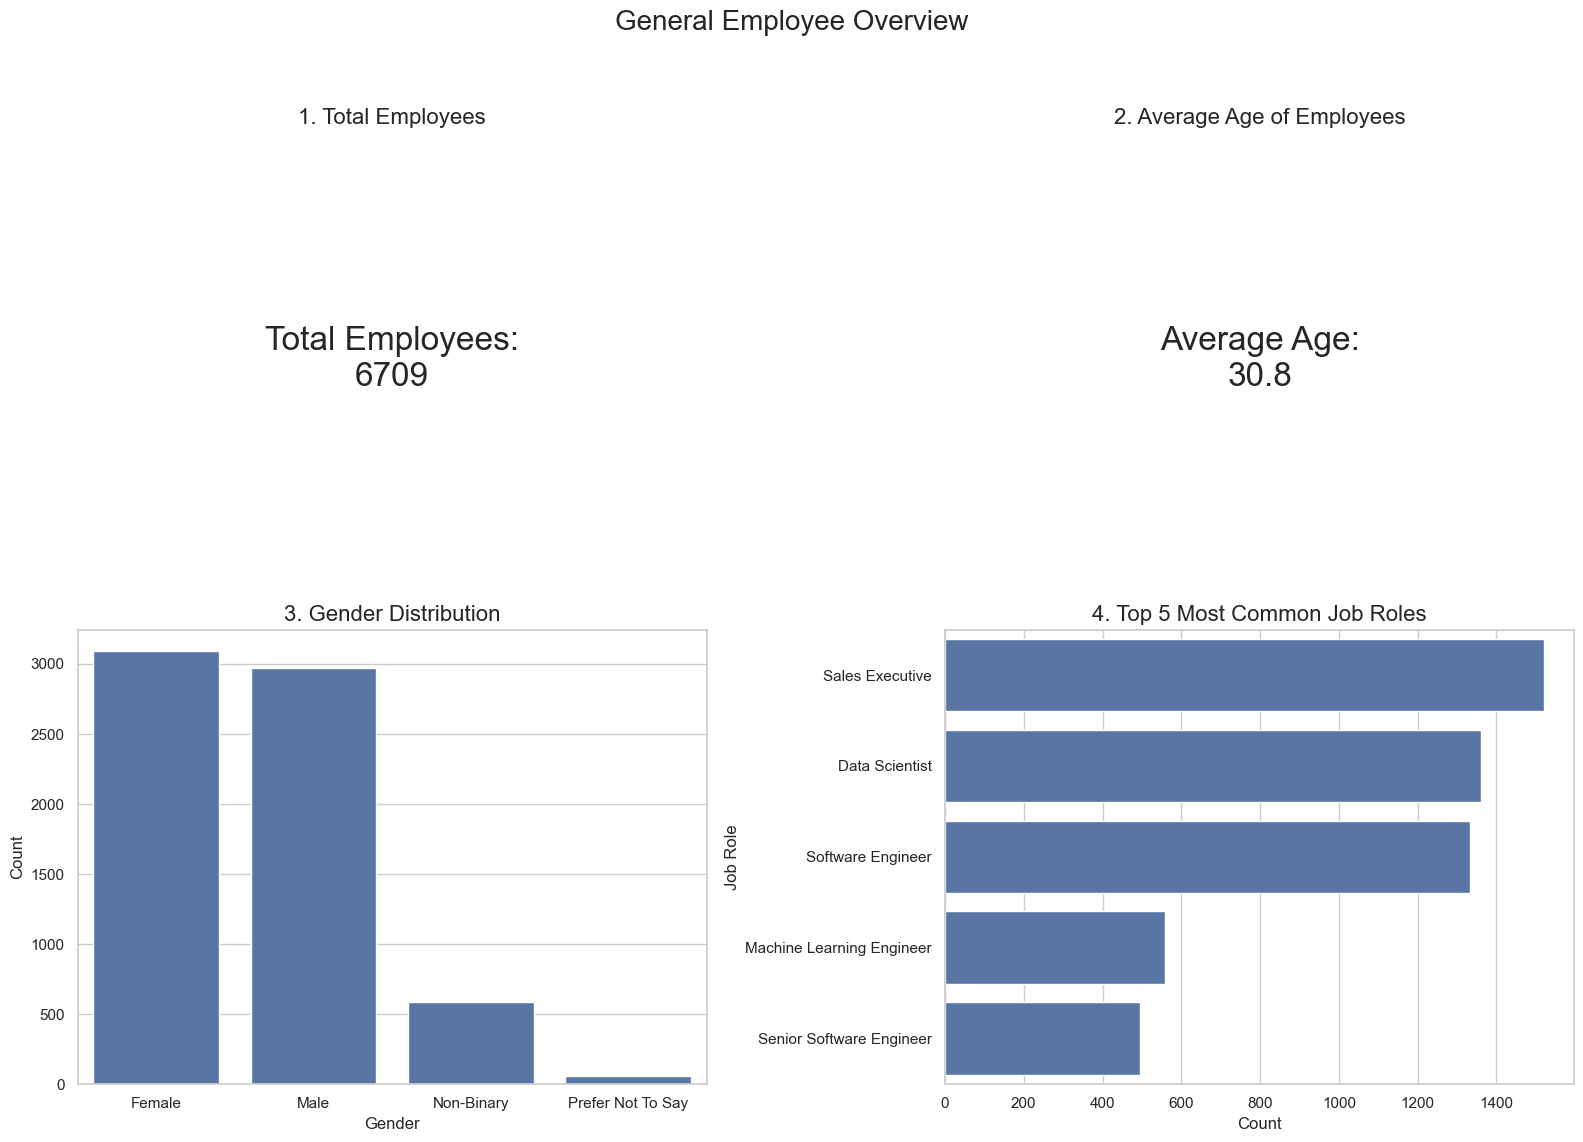

Most Common Education Level: Bachelors 


In [ ]:
# Visulaiztion

# Set style
sns.set(style="whitegrid")

# Recalculate the variables to ensure they're available
total_employees = len(cleaned_df)
average_age = cleaned_df["Age"].mean()
gender_distribution = cleaned_df["Gender"].value_counts()
most_common_edu = cleaned_df["EducationLevelLabel"].mode()[0]
common_roles = cleaned_df["JobRole"].value_counts()

# Create the figure
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("General Employee Overview", fontsize=20)

# 1. Total Employees (displayed as text in subplot)
axs[0, 0].text(0.5, 0.5, f"Total Employees:\n{total_employees}", fontsize=24, ha='center', va='center')
axs[0, 0].axis("off")
axs[0, 0].set_title("1. Total Employees", fontsize=16)

# 2. Average Age (displayed as text)
axs[0, 1].text(0.5, 0.5, f"Average Age:\n{average_age:.1f}", fontsize=24, ha='center', va='center')
axs[0, 1].axis("off")
axs[0, 1].set_title("2. Average Age of Employees", fontsize=16)

# 3. Gender Distribution (bar plot)
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, ax=axs[1, 0])
axs[1, 0].set_title("3. Gender Distribution", fontsize=16)
axs[1, 0].set_xlabel("Gender")
axs[1, 0].set_ylabel("Count")

# 4. Top 5 Common Job Roles (bar plot)
top_roles = common_roles.head(5)
sns.barplot(x=top_roles.values, y=top_roles.index, ax=axs[1, 1])
axs[1, 1].set_title("4. Top 5 Most Common Job Roles", fontsize=16)
axs[1, 1].set_xlabel("Count")
axs[1, 1].set_ylabel("Job Role")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 5. Print Most Common Education Level
print(f"Most Common Education Level: {most_common_edu}")


>>>  Attrition Analysis

In [ ]:
# 1. How many employees left vs. stayed
attrition_counts = cleaned_df["Attrition"].value_counts()

# 2. Average job satisfaction for leavers vs. stayers
job_sat_attrition = cleaned_df.groupby("AttritionFlag")["JobSatisfaction"].mean()

# 3. Average manager and self-rating by attrition
ratings_by_attrition = cleaned_df.groupby("AttritionFlag")[["ManagerRating", "SelfRating"]].mean()

# 4. Attrition rate by marital status
attrition_by_marital = cleaned_df.groupby("MaritalStatus")["AttritionFlag"].mean()

# 5. Attrition rate by education level
attrition_by_education = cleaned_df.groupby("EducationLevelLabel")["AttritionFlag"].mean()

# 6. Relationship between overtime and attrition
attrition_by_overtime = cleaned_df.groupby("OverTime")["AttritionFlag"].mean()

# 7. Average distance from home by attrition
distance_by_attrition = cleaned_df.groupby("AttritionFlag")["DistanceFromHome (KM)"].mean()

# 8. Age group with highest attrition rate
age_group_attrition = cleaned_df.groupby("AgeGroup")["AttritionFlag"].mean()

# 9. Job roles with highest attrition
job_role_attrition = cleaned_df.groupby("JobRole")["AttritionFlag"].mean()

# 10. Relationship between promotions and attrition
promotion_vs_attrition = cleaned_df.groupby("AttritionFlag")["YearsSinceLastPromotion"].mean()


In [24]:
print("1. Employees Left vs. Stayed:\n", attrition_counts, "\n")
print("2. Avg. Job Satisfaction (AttritionFlag 0=Stayed, 1=Left):\n", job_sat_attrition, "\n")
print("3. Avg. Manager & Self Ratings by Attrition:\n", ratings_by_attrition, "\n")
print("4. Attrition Rate by Marital Status:\n", attrition_by_marital, "\n")
print("5. Attrition Rate by Education Level:\n", attrition_by_education, "\n")
print("6. Attrition Rate by Overtime:\n", attrition_by_overtime, "\n")
print("7. Avg. Distance from Home by Attrition:\n", distance_by_attrition, "\n")
print("8. Attrition Rate by Age Group:\n", age_group_attrition.sort_values(ascending=False), "\n")
print("9. Attrition Rate by Job Role:\n", job_role_attrition.sort_values(ascending=False).head(5), "\n")
print("10. Avg. Years Since Last Promotion by Attrition:\n", promotion_vs_attrition, "\n")


1. Employees Left vs. Stayed:
 Attrition
No     4448
Yes    2261
Name: count, dtype: int64 

2. Avg. Job Satisfaction (AttritionFlag 0=Stayed, 1=Left):
 AttritionFlag
0    3.419739
1    3.452012
Name: JobSatisfaction, dtype: float64 

3. Avg. Manager & Self Ratings by Attrition:
                ManagerRating  SelfRating
AttritionFlag                           
0                   3.478642    3.982464
1                   3.463069    3.987174 

4. Attrition Rate by Marital Status:
 MaritalStatus
Divorced    0.222477
Married     0.263360
Single      0.479117
Name: AttritionFlag, dtype: float64 

5. Attrition Rate by Education Level:
 EducationLevelLabel
Bachelors                   0.360289
Doctorate                   0.227488
High School                 0.312361
Masters                     0.325762
No Formal Qualifications    0.353571
Name: AttritionFlag, dtype: float64 

6. Attrition Rate by Overtime:
 OverTime
No     0.234794
Yes    0.541350
Name: AttritionFlag, dtype: float64 

7. Avg.

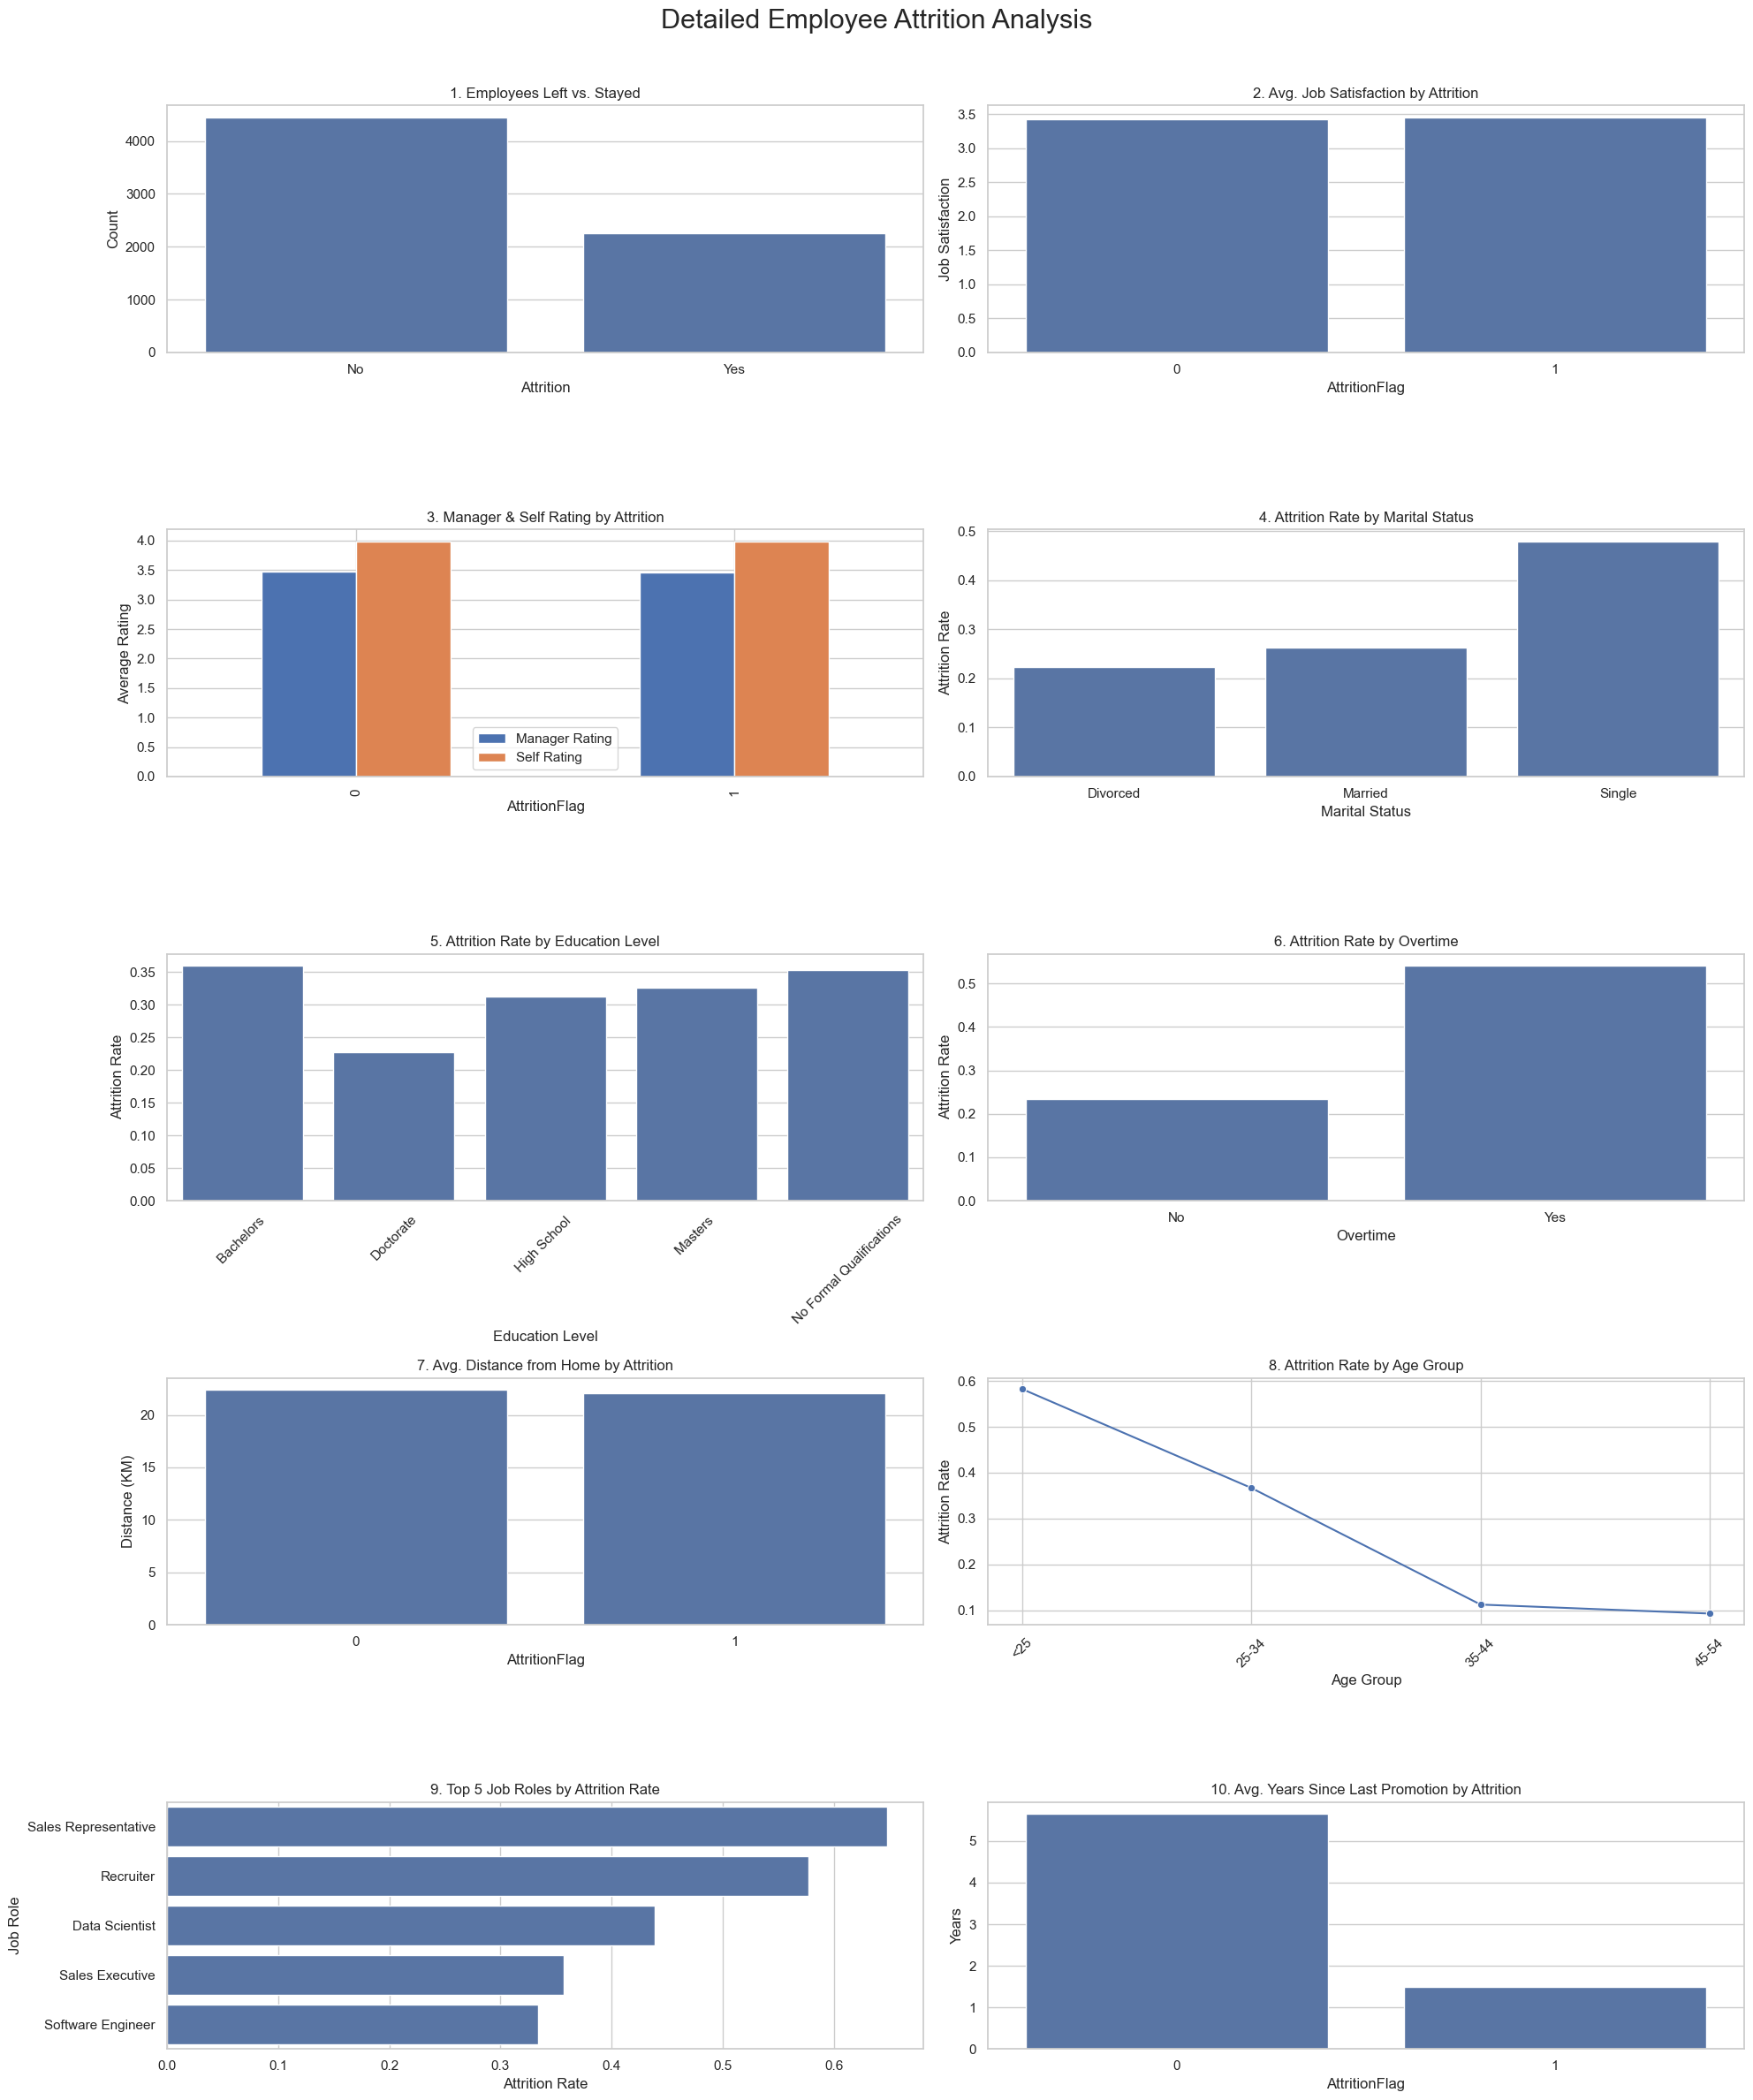

In [25]:
# Visulaiztion

# Make sure the data is ready
# attrition_counts, job_sat_attrition, ratings_by_attrition, attrition_by_marital,
# attrition_by_education, attrition_by_overtime, distance_by_attrition,
# age_group_attrition, job_role_attrition, promotion_vs_attrition

sns.set(style="whitegrid")

fig, axs = plt.subplots(5, 2, figsize=(20, 25))
fig.suptitle("Detailed Employee Attrition Analysis", fontsize=22)

# 1. Employees Left vs. Stayed
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, ax=axs[0, 0])
axs[0, 0].set_title("1. Employees Left vs. Stayed")
axs[0, 0].set_ylabel("Count")
axs[0, 0].set_xlabel("Attrition")

# 2. Average Job Satisfaction for Leavers vs. Stayers
sns.barplot(x=job_sat_attrition.index, y=job_sat_attrition.values, ax=axs[0, 1])
axs[0, 1].set_title("2. Avg. Job Satisfaction by Attrition")
axs[0, 1].set_ylabel("Job Satisfaction")
axs[0, 1].set_xlabel("AttritionFlag")

# 3. Manager and Self Ratings by Attrition
ratings_by_attrition.plot(kind="bar", ax=axs[1, 0])
axs[1, 0].set_title("3. Manager & Self Rating by Attrition")
axs[1, 0].set_ylabel("Average Rating")
axs[1, 0].legend(["Manager Rating", "Self Rating"])
axs[1, 0].set_xlabel("AttritionFlag")

# 4. Attrition Rate by Marital Status
sns.barplot(x=attrition_by_marital.index, y=attrition_by_marital.values, ax=axs[1, 1])
axs[1, 1].set_title("4. Attrition Rate by Marital Status")
axs[1, 1].set_ylabel("Attrition Rate")
axs[1, 1].set_xlabel("Marital Status")

# 5. Attrition Rate by Education Level
sns.barplot(x=attrition_by_education.index, y=attrition_by_education.values, ax=axs[2, 0])
axs[2, 0].set_title("5. Attrition Rate by Education Level")
axs[2, 0].tick_params(axis='x', rotation=45)
axs[2, 0].set_ylabel("Attrition Rate")
axs[2, 0].set_xlabel("Education Level")

# 6. Attrition Rate by Overtime
sns.barplot(x=attrition_by_overtime.index, y=attrition_by_overtime.values, ax=axs[2, 1])
axs[2, 1].set_title("6. Attrition Rate by Overtime")
axs[2, 1].set_ylabel("Attrition Rate")
axs[2, 1].set_xlabel("Overtime")

# 7. Average Distance from Home by Attrition
sns.barplot(x=distance_by_attrition.index, y=distance_by_attrition.values, ax=axs[3, 0])
axs[3, 0].set_title("7. Avg. Distance from Home by Attrition")
axs[3, 0].set_ylabel("Distance (KM)")
axs[3, 0].set_xlabel("AttritionFlag")

# 8. Age Group with Highest Attrition Rate
age_group_sorted = age_group_attrition.sort_index()
sns.lineplot(x=age_group_sorted.index, y=age_group_sorted.values, marker="o", ax=axs[3, 1])
axs[3, 1].set_title("8. Attrition Rate by Age Group")
axs[3, 1].set_ylabel("Attrition Rate")
axs[3, 1].set_xlabel("Age Group")
axs[3, 1].tick_params(axis='x', rotation=45)

# 9. Job Roles with Highest Attrition
top_roles = job_role_attrition.sort_values(ascending=False).head(5)
sns.barplot(x=top_roles.values, y=top_roles.index, ax=axs[4, 0])
axs[4, 0].set_title("9. Top 5 Job Roles by Attrition Rate")
axs[4, 0].set_xlabel("Attrition Rate")
axs[4, 0].set_ylabel("Job Role")

# 10. Promotion vs Attrition
sns.barplot(x=promotion_vs_attrition.index, y=promotion_vs_attrition.values, ax=axs[4, 1])
axs[4, 1].set_title("10. Avg. Years Since Last Promotion by Attrition")
axs[4, 1].set_ylabel("Years")
axs[4, 1].set_xlabel("AttritionFlag")

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


>>> Department & Role Insights

In [55]:
# 1. Number of employees in each department
dept_counts = cleaned_df["Department"].value_counts()

# 2. Average job satisfaction score per department
job_satisfaction_dept = cleaned_df.groupby("Department")["JobSatisfaction"].mean()

# 3. Average manager rating by department
manager_rating_dept = cleaned_df.groupby("Department")["ManagerRating"].mean()

# 4. Departments with highest average work-life balance
wlb_dept = cleaned_df.groupby("Department")["WorkLifeBalance"].mean()

# 5. Average performance rating (SelfRating) by job role
self_rating_role = cleaned_df.groupby("JobRole")["SelfRating"].mean()

# 6. Average tenure (YearsAtCompany) for each department
tenure_dept = cleaned_df.groupby("Department")["YearsAtCompany"].mean()

# 7. Average time since last promotion by department
promotion_time_dept = cleaned_df.groupby("Department")["YearsSinceLastPromotion"].mean()


C:\Users\A\AppData\Local\Temp\ipykernel_9532\1666751412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.values, y=dept_counts.index, palette="Blues_d")


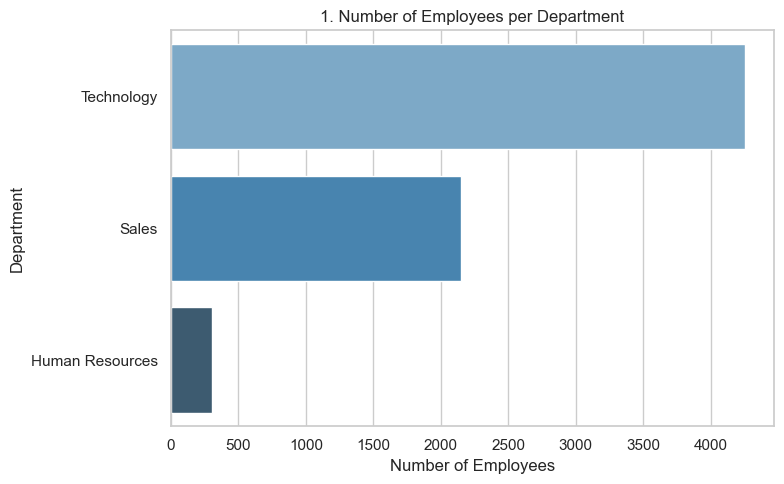

C:\Users\A\AppData\Local\Temp\ipykernel_9532\1666751412.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_satisfaction_dept.values, y=job_satisfaction_dept.index, palette="Greens_d")


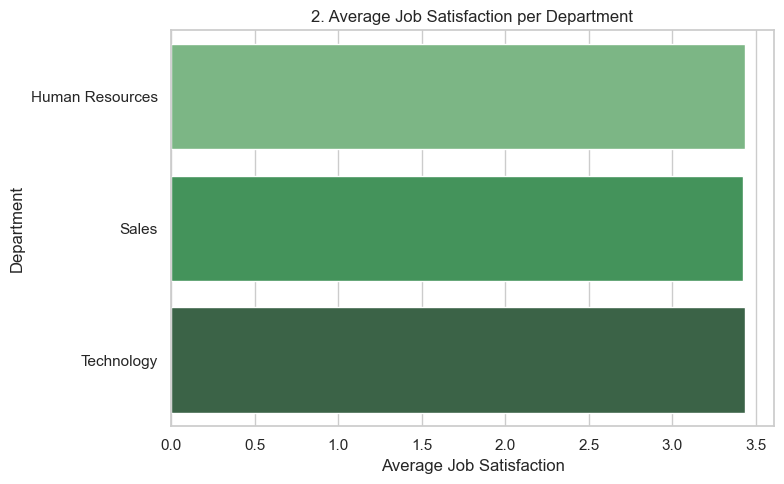

C:\Users\A\AppData\Local\Temp\ipykernel_9532\1666751412.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=manager_rating_dept.values, y=manager_rating_dept.index, palette="Purples_d")


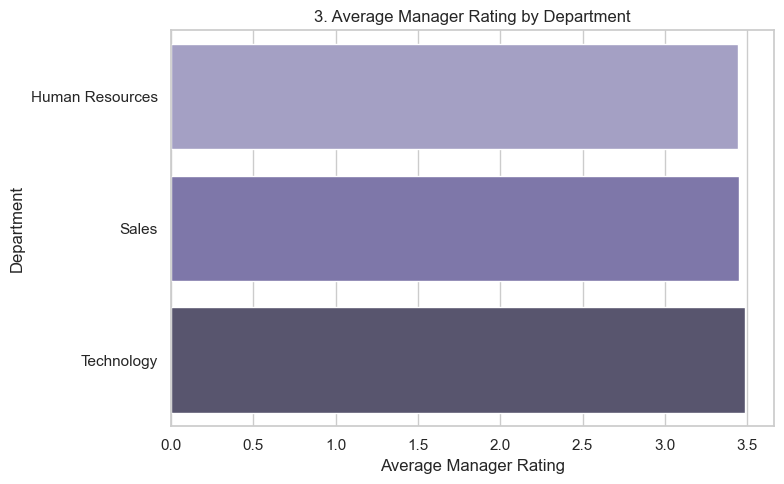

C:\Users\A\AppData\Local\Temp\ipykernel_9532\1666751412.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wlb_dept.values, y=wlb_dept.index, palette="Oranges_d")


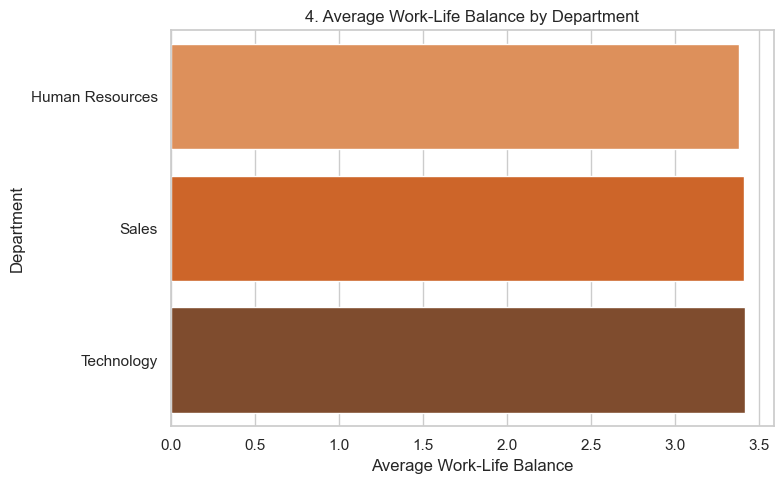

C:\Users\A\AppData\Local\Temp\ipykernel_9532\1666751412.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=self_rating_role.values, y=self_rating_role.index, palette="coolwarm")


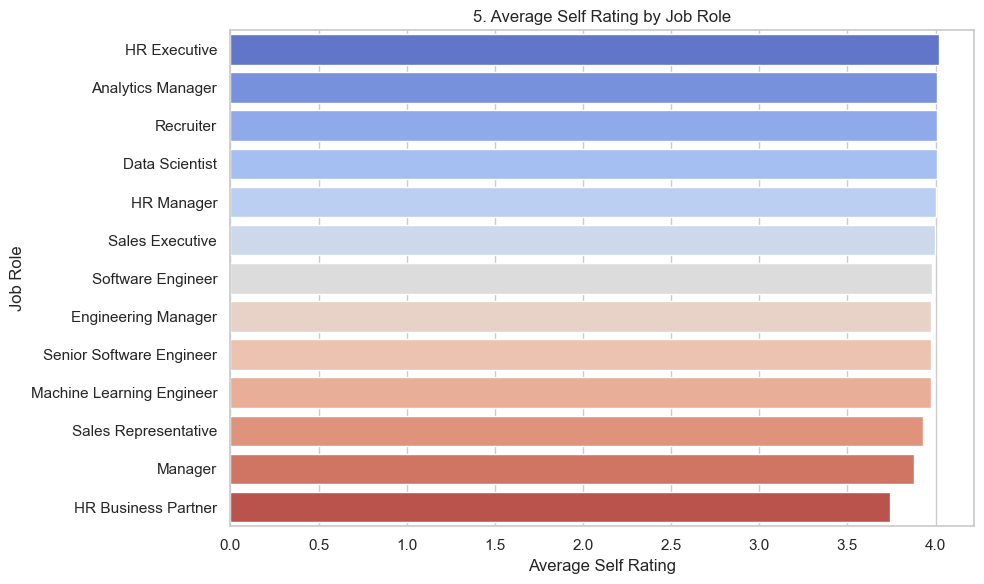

C:\Users\A\AppData\Local\Temp\ipykernel_9532\1666751412.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tenure_dept.values, y=tenure_dept.index, palette="BuGn_r")


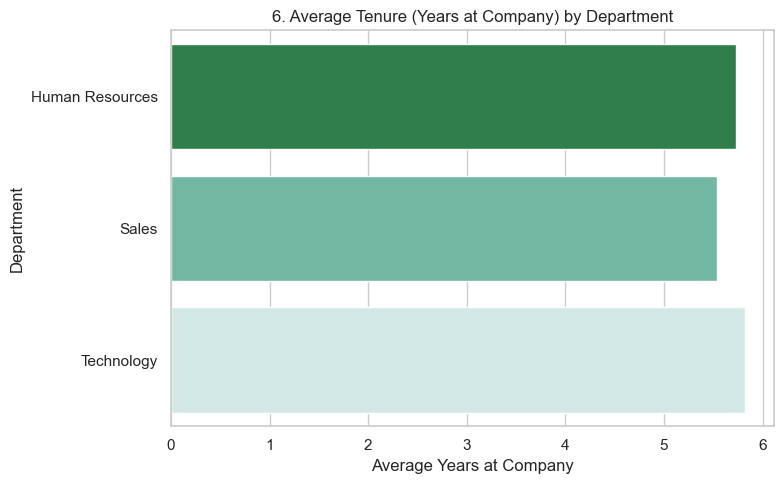

C:\Users\A\AppData\Local\Temp\ipykernel_9532\1666751412.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promotion_time_dept.values, y=promotion_time_dept.index, palette="YlOrBr")


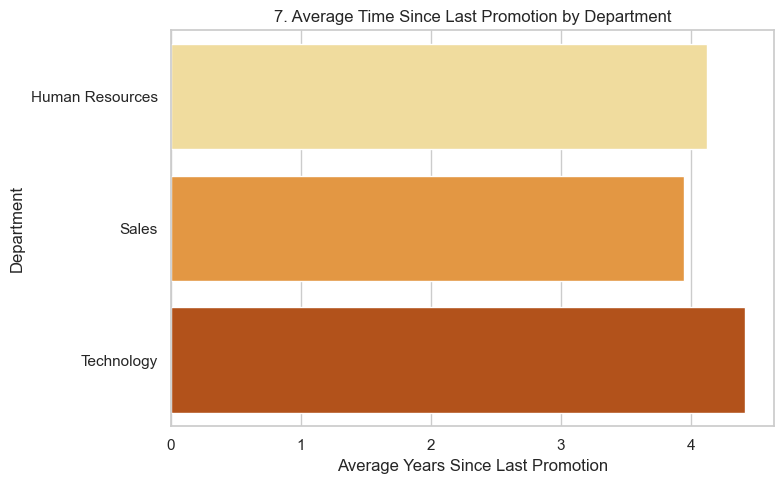

In [36]:
# Visulaiztion

# 1. Number of employees in each department
dept_counts = cleaned_df["Department"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=dept_counts.values, y=dept_counts.index, palette="Blues_d")
plt.title("1. Number of Employees per Department")
plt.xlabel("Number of Employees")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

# 2. Average job satisfaction score per department
job_satisfaction_dept = cleaned_df.groupby("Department")["JobSatisfaction"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=job_satisfaction_dept.values, y=job_satisfaction_dept.index, palette="Greens_d")
plt.title("2. Average Job Satisfaction per Department")
plt.xlabel("Average Job Satisfaction")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

# 3. Average manager rating by department
manager_rating_dept = cleaned_df.groupby("Department")["ManagerRating"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=manager_rating_dept.values, y=manager_rating_dept.index, palette="Purples_d")
plt.title("3. Average Manager Rating by Department")
plt.xlabel("Average Manager Rating")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

# 4. Departments with highest average work-life balance
wlb_dept = cleaned_df.groupby("Department")["WorkLifeBalance"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=wlb_dept.values, y=wlb_dept.index, palette="Oranges_d")
plt.title("4. Average Work-Life Balance by Department")
plt.xlabel("Average Work-Life Balance")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

# 5. Average performance rating (SelfRating) by job role
self_rating_role = cleaned_df.groupby("JobRole")["SelfRating"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=self_rating_role.values, y=self_rating_role.index, palette="coolwarm")
plt.title("5. Average Self Rating by Job Role")
plt.xlabel("Average Self Rating")
plt.ylabel("Job Role")
plt.tight_layout()
plt.show()

# 6. Average tenure (YearsAtCompany) for each department
tenure_dept = cleaned_df.groupby("Department")["YearsAtCompany"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=tenure_dept.values, y=tenure_dept.index, palette="BuGn_r")
plt.title("6. Average Tenure (Years at Company) by Department")
plt.xlabel("Average Years at Company")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

# 7. Average time since last promotion by department
promotion_time_dept = cleaned_df.groupby("Department")["YearsSinceLastPromotion"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=promotion_time_dept.values, y=promotion_time_dept.index, palette="YlOrBr")
plt.title("7. Average Time Since Last Promotion by Department")
plt.xlabel("Average Years Since Last Promotion")
plt.ylabel("Department")
plt.tight_layout()
plt.show()


>>> Compensation & Demographics

In [47]:
# 1. Average salary by gender
salary_by_gender = cleaned_df.groupby("Gender")["Salary"].mean()

# 2. Average salary by stock option level
salary_by_stock_option = cleaned_df.groupby("StockOptionLevel")["Salary"].mean()

# 3. Average environment satisfaction per state
env_satisfaction_state = cleaned_df.groupby("State")["EnvironmentSatisfaction"].mean()


C:\Users\A\AppData\Local\Temp\ipykernel_9532\3802135485.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_by_gender.index, y=salary_by_gender.values, palette="Set2")


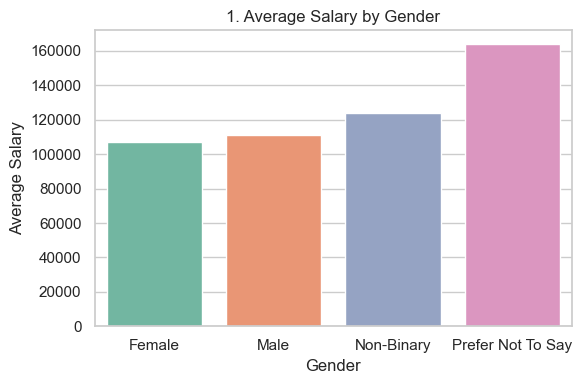

C:\Users\A\AppData\Local\Temp\ipykernel_9532\3802135485.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_by_stock_option.index.astype(str), y=salary_by_stock_option.values, palette="Set3")


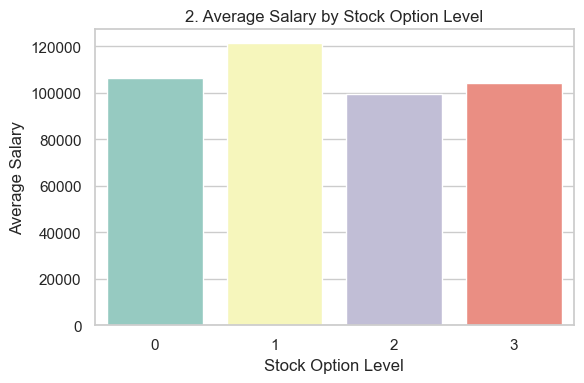

C:\Users\A\AppData\Local\Temp\ipykernel_9532\3802135485.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=env_satisfaction_state.values, y=env_satisfaction_state.index, palette="coolwarm")


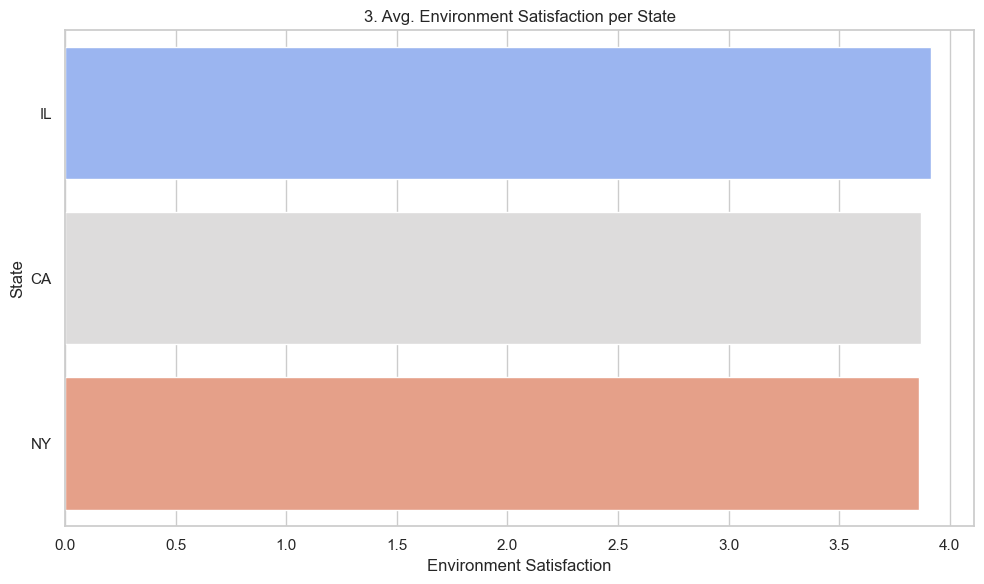

In [37]:
# Visulaiztion

# 1. Average salary by gender
salary_by_gender = cleaned_df.groupby("Gender")["Salary"].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=salary_by_gender.index, y=salary_by_gender.values, palette="Set2")
plt.title("1. Average Salary by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Salary")
plt.tight_layout()
plt.show()

# 2. Average salary by stock option level
salary_by_stock_option = cleaned_df.groupby("StockOptionLevel")["Salary"].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=salary_by_stock_option.index.astype(str), y=salary_by_stock_option.values, palette="Set3")
plt.title("2. Average Salary by Stock Option Level")
plt.xlabel("Stock Option Level")
plt.ylabel("Average Salary")
plt.tight_layout()
plt.show()

# 3. Average environment satisfaction per state
env_satisfaction_state = cleaned_df.groupby("State")["EnvironmentSatisfaction"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=env_satisfaction_state.values, y=env_satisfaction_state.index, palette="coolwarm")
plt.title("3. Avg. Environment Satisfaction per State")
plt.xlabel("Environment Satisfaction")
plt.ylabel("State")
plt.tight_layout()
plt.show()


>>> Engagement, Training & Performance

In [38]:
# 1. Number of employees by self-rating performance
self_rating_counts = cleaned_df["SelfRating"].value_counts()

# 2. Relationship between training opportunities taken and job satisfaction
training_vs_satisfaction = cleaned_df.groupby("TrainingOpportunitiesTaken")["JobSatisfaction"].mean()

# 3. Percentage of employees promoted in last 3 years
promoted_last_3_years_pct = (cleaned_df["YearsSinceLastPromotion"] <= 3).mean() * 100


C:\Users\A\AppData\Local\Temp\ipykernel_9532\3308891142.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.values, y=dept_counts.index, palette="Blues_d")


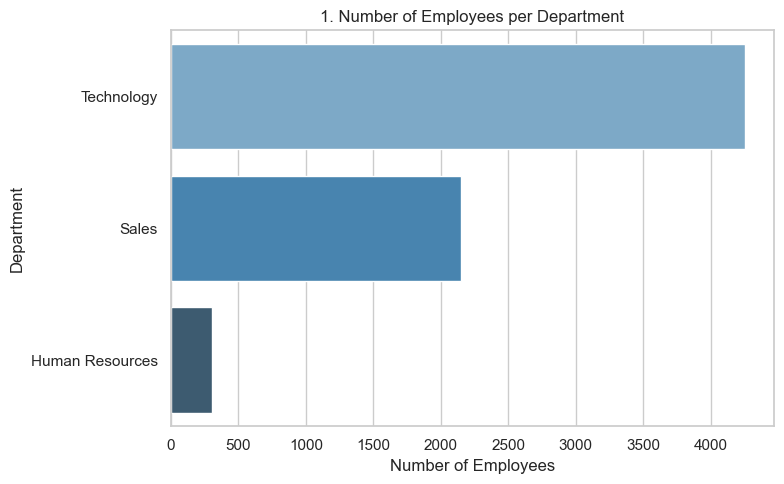

C:\Users\A\AppData\Local\Temp\ipykernel_9532\3308891142.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_satisfaction_dept.values, y=job_satisfaction_dept.index, palette="Greens_d")


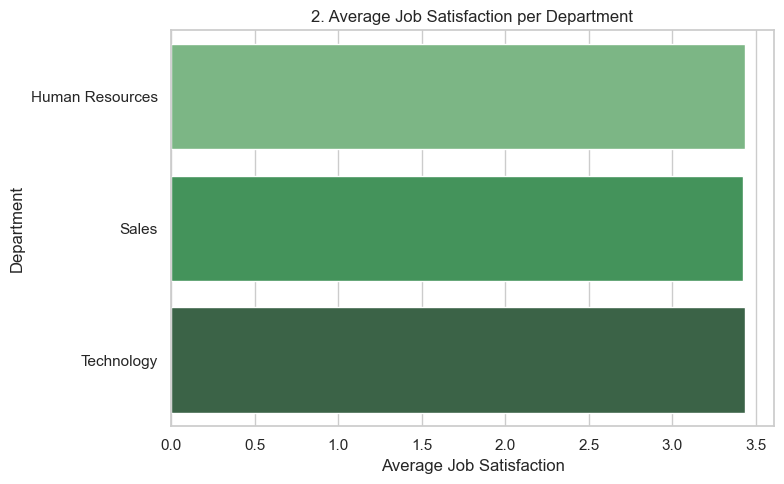

C:\Users\A\AppData\Local\Temp\ipykernel_9532\3308891142.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=manager_rating_dept.values, y=manager_rating_dept.index, palette="Purples_d")


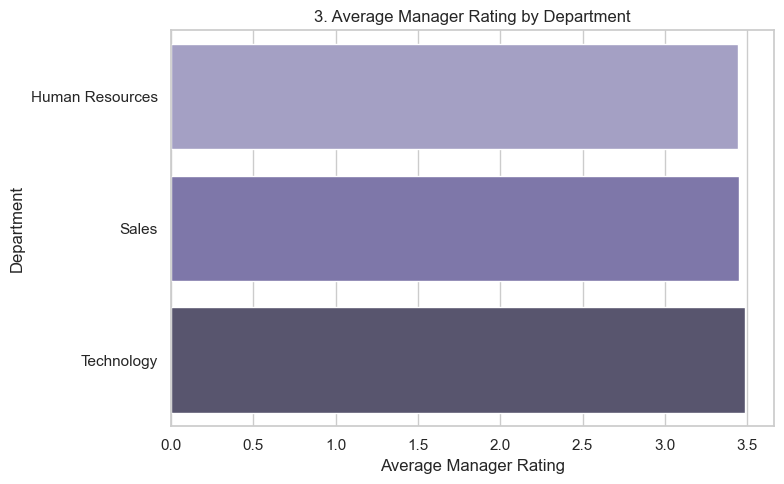

C:\Users\A\AppData\Local\Temp\ipykernel_9532\3308891142.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wlb_dept.values, y=wlb_dept.index, palette="Oranges_d")


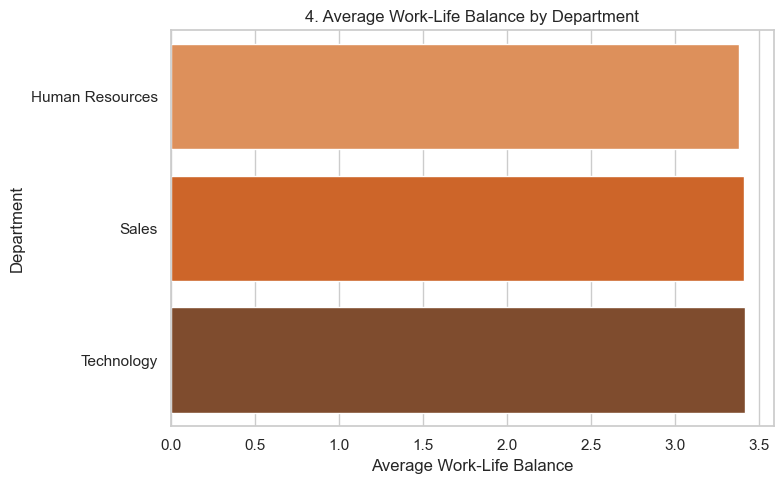

C:\Users\A\AppData\Local\Temp\ipykernel_9532\3308891142.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=self_rating_role.values, y=self_rating_role.index, palette="coolwarm")


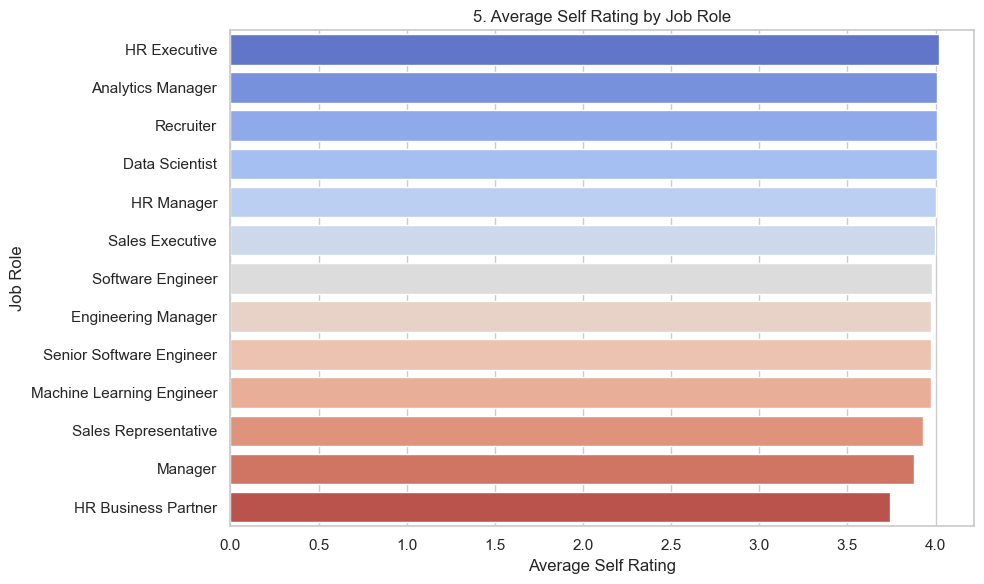

C:\Users\A\AppData\Local\Temp\ipykernel_9532\3308891142.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tenure_dept.values, y=tenure_dept.index, palette="BuGn_r")


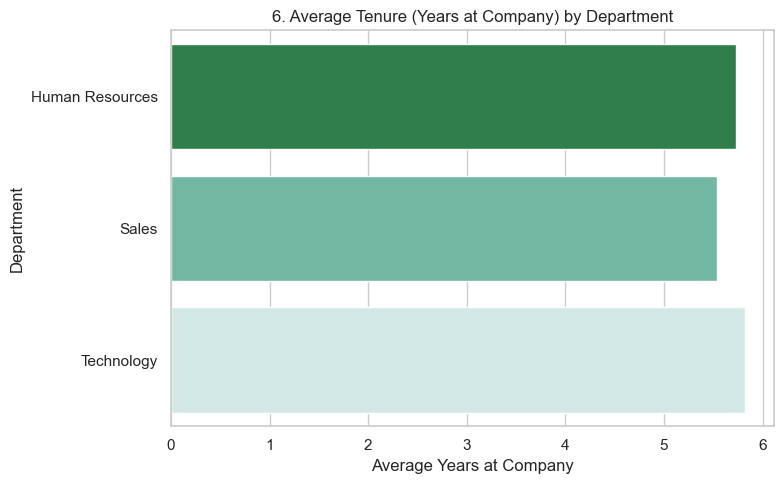

C:\Users\A\AppData\Local\Temp\ipykernel_9532\3308891142.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promotion_time_dept.values, y=promotion_time_dept.index, palette="YlOrBr")


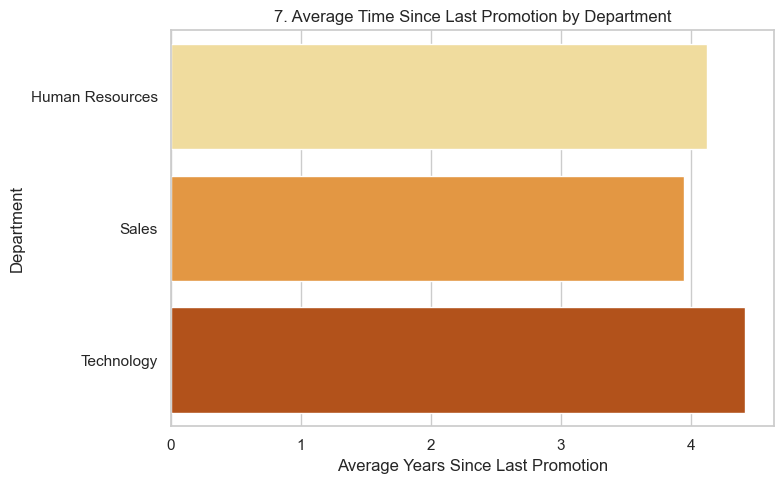

In [39]:
# Visulaziation

# 1. Number of employees in each department
dept_counts = cleaned_df["Department"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=dept_counts.values, y=dept_counts.index, palette="Blues_d")
plt.title("1. Number of Employees per Department")
plt.xlabel("Number of Employees")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

# 2. Average job satisfaction score per department
job_satisfaction_dept = cleaned_df.groupby("Department")["JobSatisfaction"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=job_satisfaction_dept.values, y=job_satisfaction_dept.index, palette="Greens_d")
plt.title("2. Average Job Satisfaction per Department")
plt.xlabel("Average Job Satisfaction")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

# 3. Average manager rating by department
manager_rating_dept = cleaned_df.groupby("Department")["ManagerRating"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=manager_rating_dept.values, y=manager_rating_dept.index, palette="Purples_d")
plt.title("3. Average Manager Rating by Department")
plt.xlabel("Average Manager Rating")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

# 4. Departments with highest average work-life balance
wlb_dept = cleaned_df.groupby("Department")["WorkLifeBalance"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=wlb_dept.values, y=wlb_dept.index, palette="Oranges_d")
plt.title("4. Average Work-Life Balance by Department")
plt.xlabel("Average Work-Life Balance")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

# 5. Average performance rating (SelfRating) by job role
self_rating_role = cleaned_df.groupby("JobRole")["SelfRating"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=self_rating_role.values, y=self_rating_role.index, palette="coolwarm")
plt.title("5. Average Self Rating by Job Role")
plt.xlabel("Average Self Rating")
plt.ylabel("Job Role")
plt.tight_layout()
plt.show()

# 6. Average tenure (YearsAtCompany) for each department
tenure_dept = cleaned_df.groupby("Department")["YearsAtCompany"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=tenure_dept.values, y=tenure_dept.index, palette="BuGn_r")
plt.title("6. Average Tenure (Years at Company) by Department")
plt.xlabel("Average Years at Company")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

# 7. Average time since last promotion by department
promotion_time_dept = cleaned_df.groupby("Department")["YearsSinceLastPromotion"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=promotion_time_dept.values, y=promotion_time_dept.index, palette="YlOrBr")
plt.title("7. Average Time Since Last Promotion by Department")
plt.xlabel("Average Years Since Last Promotion")
plt.ylabel("Department")
plt.tight_layout()
plt.show()
